In [13]:
from google.colab import files

uploaded = files.upload()


Saving weather_data.csv to weather_data (1).csv


In [14]:
import pandas as pd

df = pd.read_csv('weather_data.csv')

df.head()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331


In [15]:
df.isnull().sum()

,0
date,0
avg_temperature,15
humidity,15
avg_wind_speed,15
rain_or_not,0
cloud_cover,15
pressure,0


In [16]:
df['date'] = pd.to_datetime(df['date'])

df.head()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331


In [18]:
df.fillna(df.select_dtypes(include = ['number']).median(), inplace = True) #fill the missing values for numeric columns
df.fillna(df.select_dtypes(include=['object']).mode().iloc[0], inplace=True)# fill missing values for categorical columns with mist frequebt value

df.isnull().sum()

,0
date,0
avg_temperature,0
humidity,0
avg_wind_speed,0
rain_or_not,0
cloud_cover,0
pressure,0


In [20]:
df[df[['avg_temperature', 'humidity', 'avg_wind_speed']].lt(0).any(axis=1)]
#check for negative values in numerical columns

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure


In [21]:
df[['avg_temperature', 'humidity', 'avg_wind_speed']] = df[['avg_temperature', 'humidity', 'avg_wind_speed']].apply(lambda x: x.clip(lower=0))
#if there is any nagative numbers replace with medain

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['avg_temperature', 'humidity', 'avg_wind_speed']] = scaler.fit_transform(df[['avg_temperature', 'humidity', 'avg_wind_speed']])

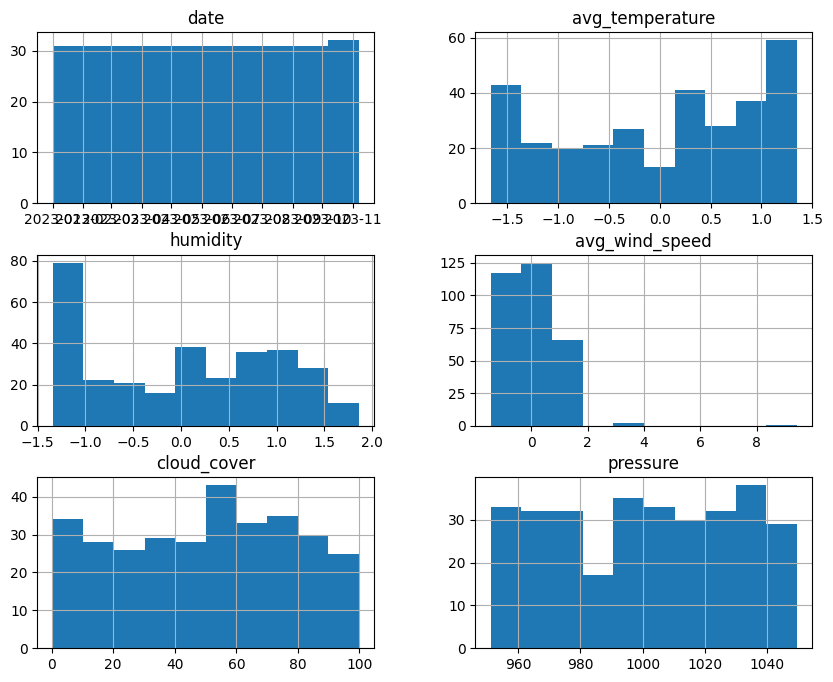

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(10, 8))
plt.show()

In [28]:
df['rain_or_not'] = df['rain_or_not'].map({'Rain': 1, 'No Rain': 0})  # Convert categorical to numeric

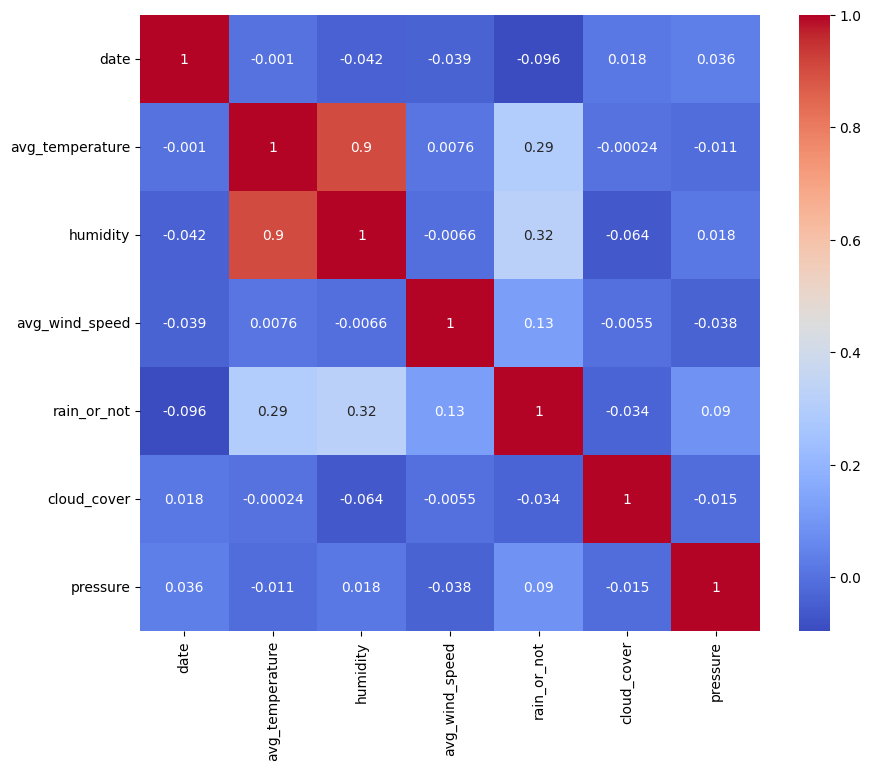

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

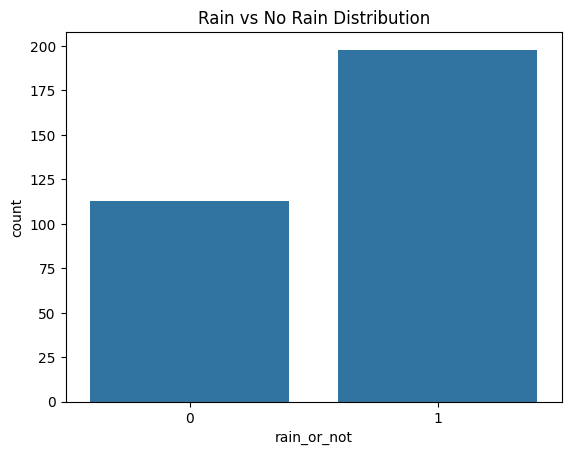

In [30]:
sns.countplot(x='rain_or_not', data=df)
plt.title("Rain vs No Rain Distribution")
plt.show()

In [37]:
from sklearn.model_selection import train_test_split

x = df[['avg_temperature', 'humidity', 'avg_wind_speed']]
y = df['rain_or_not']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

#make predictions on the test set
y_pred = model.predict(x_test)

In [33]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5555555555555556

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.32      0.33        22
           1       0.65      0.68      0.67        41

    accuracy                           0.56        63
   macro avg       0.50      0.50      0.50        63
weighted avg       0.55      0.56      0.55        63



In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100,150], 'max_depth': [None, 10, 20]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

print("Best parameters :", best_params)

Best parameters : {'max_depth': 20, 'n_estimators': 50}


In [50]:
#get the probabilities of predictions
rain_probabilities = model.predict_proba(x_test)[:, 1]

#print(rain_probabilities[:21])
rain_predictions = (rain_probabilities >= 0.5).astype(int)

for i in range (21):
  print("Day ",i+1 ," - ", "Probability of rain -",rain_probabilities[i]*100 ,"%")

Day  1  -  Probability of rain - 68.0 %
Day  2  -  Probability of rain - 94.0 %
Day  3  -  Probability of rain - 54.93544046940335 %
Day  4  -  Probability of rain - 81.0 %
Day  5  -  Probability of rain - 97.0 %
Day  6  -  Probability of rain - 17.0 %
Day  7  -  Probability of rain - 48.0 %
Day  8  -  Probability of rain - 24.0 %
Day  9  -  Probability of rain - 53.0 %
Day  10  -  Probability of rain - 64.0 %
Day  11  -  Probability of rain - 57.99999999999999 %
Day  12  -  Probability of rain - 91.0 %
Day  13  -  Probability of rain - 55.00000000000001 %
Day  14  -  Probability of rain - 55.00000000000001 %
Day  15  -  Probability of rain - 52.0 %
Day  16  -  Probability of rain - 72.0 %
Day  17  -  Probability of rain - 86.0 %
Day  18  -  Probability of rain - 85.0 %
Day  19  -  Probability of rain - 78.0 %
Day  20  -  Probability of rain - 47.29166666666667 %
Day  21  -  Probability of rain - 28.999999999999996 %
